In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#from tensorflow.keras import layers
#from tensorflow.keras import regularizers
import keras_tuner as kt

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
#from sklearn.preprocessing import OneHotEncoder


tf.__version__

'2.11.0'

In [9]:
# Load dataset
csv_file = '../../Datasets/dataset_Halogenos_Rmin.csv'
#csv_file = '../Dataset/dataset_augmented.csv'
#csv_file = '../Dataset/dataset_left.csv'
dataframe_raw = pd.read_csv(csv_file)
dataframe_raw = dataframe_raw.drop(dataframe_raw.columns[0],axis=1) # remove first column (no information there)
dataframe_raw.head()

,Pos1,Pos2,Pos3,Pos4,Pos5,Pos6,Pos7,Pos8,Pos9,Pos10,Pos11,Pos12,Pos13,Pos14,Pos15,Pos16,Nsubs,R,lambd
0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,2,-273.2294,350.23
1,0,2,0,0,0,4,0,0,0,0,0,3,0,0,0,0,3,-244.0982,353.40
2,0,0,0,0,0,0,0,3,0,0,3,3,4,2,0,0,5,-194.6106,359.97
3,0,4,0,4,0,0,0,0,0,0,0,2,0,0,3,3,5,-237.2939,369.31
4,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,2,-309.5538,347.50


In [10]:
dataframe = dataframe_raw.copy()

# Create a target variable
dataframe['target'] = dataframe['R']

# Create array with number of subtitutes
nsubs = []
nsubs[:] = dataframe['Nsubs']

# Drop unused features.
dataframe = dataframe.drop(columns=['R', 'lambd', 'Nsubs'])
dataframe.head()

,Pos1,Pos2,Pos3,Pos4,Pos5,Pos6,Pos7,Pos8,Pos9,Pos10,Pos11,Pos12,Pos13,Pos14,Pos15,Pos16,target
0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,-273.2294
1,0,2,0,0,0,4,0,0,0,0,0,3,0,0,0,0,-244.0982
2,0,0,0,0,0,0,0,3,0,0,3,3,4,2,0,0,-194.6106
3,0,4,0,4,0,0,0,0,0,0,0,2,0,0,3,3,-237.2939
4,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,-309.5538


1
32
151
202
209
210
378


Text(0, 0.5, 'count')

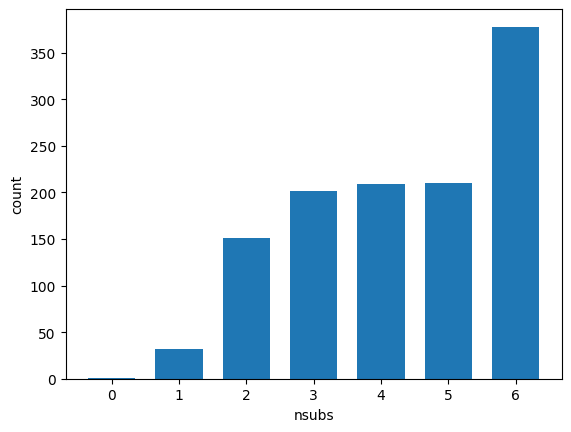

In [11]:
# number of substitutes

n0 = nsubs.count(0)
n1 = nsubs.count(1)
n2 = nsubs.count(2)
n3 = nsubs.count(3)
n4 = nsubs.count(4)
n5 = nsubs.count(5)
n6 = nsubs.count(6)
print(n0)
print(n1)
print(n2)
print(n3)
print(n4)
print(n5)
print(n6)

bin_edges = np.arange(-0.5,6.5+1,1)
plt.hist(nsubs, bins=bin_edges, rwidth=0.7)
plt.xlabel('nsubs')
plt.ylabel('count')

In [12]:
# Check overal statistis of each input feature 
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pos1,1183.0,0.615385,1.202789,0.0000,0.00000,0.0000,1.00000,4.0000
Pos2,1183.0,0.701606,1.251621,0.0000,0.00000,0.0000,1.00000,4.0000
Pos3,1183.0,0.606086,1.205752,0.0000,0.00000,0.0000,0.00000,4.0000
Pos4,1183.0,0.655114,1.214439,0.0000,0.00000,0.0000,1.00000,4.0000
Pos5,1183.0,0.726120,1.301198,0.0000,0.00000,0.0000,1.00000,4.0000
Pos6,1183.0,0.639053,1.232964,0.0000,0.00000,0.0000,1.00000,4.0000
Pos7,1183.0,0.631445,1.207461,0.0000,0.00000,0.0000,1.00000,4.0000
Pos8,1183.0,0.689772,1.241263,0.0000,0.00000,0.0000,1.00000,4.0000
Pos9,1183.0,0.674556,1.233248,0.0000,0.00000,0.0000,1.00000,4.0000
Pos10,1183.0,0.716822,1.290383,0.0000,0.00000,0.0000,1.00000,4.0000


/tmp/ipykernel_85449/3989795848.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[['target']])


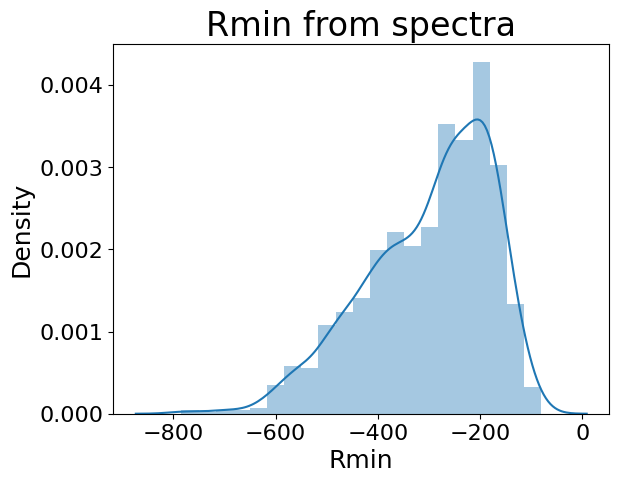

In [13]:
# Inspect the data with the joint distribition of a few pairs of columns from the training set

#sns.pairplot(dataframe[['target']], diag_kind='kde')
#sns.set_style('darkgrid')
sns.distplot(dataframe[['target']])
plt.title('Rmin from spectra',fontsize=24)
plt.xlabel('Rmin',fontsize=18)
plt.ylabel('Density',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Text(0, 0.5, 'Rmin')

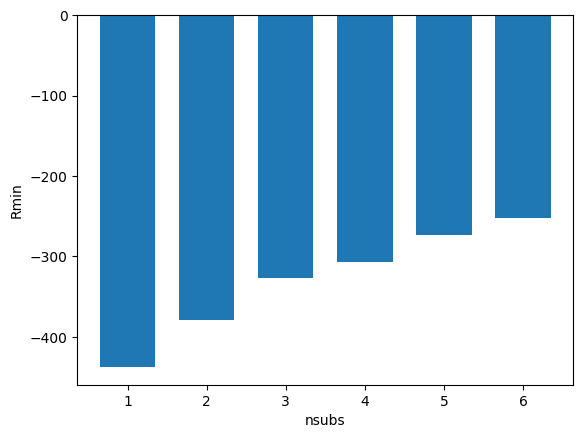

In [14]:
# Rmin as a function of nsubs
Rmin = []
Rmin[:] = dataframe['target']

nsubs1 = [i for i in range(len(nsubs)) if nsubs[i]==1]
nsubs2 = [i for i in range(len(nsubs)) if nsubs[i]==2]
nsubs3 = [i for i in range(len(nsubs)) if nsubs[i]==3]
nsubs4 = [i for i in range(len(nsubs)) if nsubs[i]==4]
nsubs5 = [i for i in range(len(nsubs)) if nsubs[i]==5]
nsubs6 = [i for i in range(len(nsubs)) if nsubs[i]==6]

Rmin1 = [Rmin[i] for i in nsubs1]
Rmin2 = [Rmin[i] for i in nsubs2]
Rmin3 = [Rmin[i] for i in nsubs3]
Rmin4 = [Rmin[i] for i in nsubs4]
Rmin5 = [Rmin[i] for i in nsubs5]
Rmin6 = [Rmin[i] for i in nsubs6]

Rmin1_mean = np.mean(Rmin1)
Rmin2_mean = np.mean(Rmin2)
Rmin3_mean = np.mean(Rmin3)
Rmin4_mean = np.mean(Rmin4)
Rmin5_mean = np.mean(Rmin5)
Rmin6_mean = np.mean(Rmin6)

Rmin_mean = [Rmin1_mean, Rmin2_mean, Rmin3_mean, Rmin4_mean, Rmin5_mean, Rmin6_mean]

bin_edges = np.arange(1.5,6.5+1,1)
plt.bar([1,2,3,4,5,6],Rmin_mean, width=0.7)
plt.xlabel('nsubs')
plt.ylabel('Rmin')

In [8]:
# remove data with R~8

#dataframe = dataframe[ dataframe['target']>10 ]
#dataframe.describe().transpose()

""" # remove data with target<Rmin
Rmin = 380
dataframe = dataframe[ dataframe['target']>Rmin ]
print(dataframe.describe().transpose()) """

" # remove data with target<Rmin\nRmin = 380\ndataframe = dataframe[ dataframe['target']>Rmin ]\nprint(dataframe.describe().transpose()) "

In [15]:
# normalize numerical targets

R_mean = dataframe['target'].mean()
R_std = dataframe['target'].std()

dataset = dataframe.copy()

dataset['target']=(dataset['target']-R_mean)/R_std

# Check overal statistis of each input feature 
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pos1,1183.0,6.153846e-01,1.202789,0.000000,0.000000,0.000000,1.00000,4.000000
Pos2,1183.0,7.016061e-01,1.251621,0.000000,0.000000,0.000000,1.00000,4.000000
Pos3,1183.0,6.060862e-01,1.205752,0.000000,0.000000,0.000000,0.00000,4.000000
Pos4,1183.0,6.551141e-01,1.214439,0.000000,0.000000,0.000000,1.00000,4.000000
Pos5,1183.0,7.261200e-01,1.301198,0.000000,0.000000,0.000000,1.00000,4.000000
Pos6,1183.0,6.390533e-01,1.232964,0.000000,0.000000,0.000000,1.00000,4.000000
Pos7,1183.0,6.314455e-01,1.207461,0.000000,0.000000,0.000000,1.00000,4.000000
Pos8,1183.0,6.897718e-01,1.241263,0.000000,0.000000,0.000000,1.00000,4.000000
Pos9,1183.0,6.745562e-01,1.233248,0.000000,0.000000,0.000000,1.00000,4.000000
Pos10,1183.0,7.168216e-01,1.290383,0.000000,0.000000,0.000000,1.00000,4.000000


In [16]:
# One-hot encode inpute features manually 
n_data = dataset.shape[0]
n_atom_types = 5   # (H,Fl,Cl,Br,I)
#n_atom_types = 5   # (H,CN,CHO,COOH,NO2)
n_pos = 16         # 6-helicenes have 16 possible positions to be occupied
n_features = int(n_atom_types*n_pos)
x_data = np.zeros( (n_data, n_features) )
y_data = np.zeros(n_data)

n_labels = 1
data = np.zeros( (n_data, n_features+n_labels) )

dataset_np = dataset.to_numpy()
#print(dataset_np.shape)
for i in range(n_data):
    for j in range(n_pos):
        atom_id = int(dataset_np[i,j])
        x_data[i,j*n_atom_types+atom_id] = 1.0

    #print(x_data[i,:])
    #print(dataset_np[i,:16])

    y_data[i] = dataset_np[i,n_pos]

    data[i,0:n_features] = x_data[i,:] 
    data[i,n_features] = y_data[i]

print(x_data.shape)
print(y_data.shape)
print(data.shape)


(1183, 80)
(1183,)
(1183, 81)


In [17]:
# number of molecules with two adjacent subsituents

n_mol_adj = 0
for i in range(n_data):
    x_molecule = dataset_np[i,0:n_pos]
    for j in range(n_pos-1):
        if( x_molecule[j]>0 and x_molecule[j+1]>0 ):
            n_mol_adj = n_mol_adj + 1
            #print(x_molecule)
            break
print(n_mol_adj)
perc_adj = np.round(float(n_mol_adj/n_data)*100,2)
print(str(perc_adj)+ ' %'+' of the data has adjacent substituents')

770
65.09 % of the data has adjacent substituents


In [18]:
# dimension of tensorial product space
n_dim_2body = n_atom_types * n_atom_types
# number 2-body of components 
n_features_2body = (n_pos-1) * n_dim_2body


In [19]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#x_data = data[:,0:n_features]
#y_data = data[:,n_features]
#data = shuffle(data, random_state=39)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(x_data_both, y_data, test_size=0.2, random_state=42)

print(len(x_train), 'training examples')
print(len(x_test), 'test and validation examples')
print(x_train.shape)
print(y_train.shape)

946 training examples
237 test and validation examples
(946, 80)
(946,)


In [20]:
# Define layer for tensorial product and be able to load a pre-trained model

#def einsum_fn( x1,x2 ):
#    return tf.einsum('bij,bkj->bik', x1, x2)

class EinsumLayer(tf.keras.layers.Layer):
    """
    Layer wrapping a single tf.einsum operation.

    Usage:
    x = EinsumLayer("bmhwf,bmoh->bmowf")((x1, x2))
    """

    def __init__(self, equation: str):
        super().__init__()
        self.equation = equation

    def call(self, inputs, *args, **kwargs):
        return tf.einsum(self.equation, *inputs)

    def get_config(self):
        return {"equation": self.equation}

In [21]:
# 2-body model with two inputs

# -------------------------------------------------------------------
# INPUTS
# -------------------------------------------------------------------
print('INPUTS')

#inputs_1b = tf.keras.Input(shape=(n_features,),name='Molecule')
#inputs_1b = tf.keras.Input(shape=(None,n_features),name='Molecule')
inputs_1b = tf.keras.Input(shape=(n_features,),name='Molecule')
print(inputs_1b)

# -------------------------------------------------------------------
# 1-body term
# -------------------------------------------------------------------
print()
print('1-BODY')


# Split the input vector into differents positions with cropping
inputs_1b_aux = tf.keras.layers.Reshape((n_features,1), input_shape=(n_features,),name='Molecule_aux')(inputs_1b)

single_position = []
for i in range(n_pos):
    init = i * n_atom_types
    end = init + n_atom_types
    left_crop = init
    right_crop = n_features - end
    pos_i = tf.keras.layers.Cropping1D(cropping=(left_crop,right_crop),name='Pos_'+str(i))(inputs_1b_aux)
    #print(pos_i)
    single_position.append(pos_i)
print(len(single_position))

# Define architecture of 1-body models
def model_1body():
    inputs = tf.keras.Input( shape=(n_atom_types,) )
    outputs = tf.keras.layers.Dense(1,use_bias=False,kernel_initializer='random_normal',name='1B_'+str(i))(inputs)
    return tf.keras.Model(inputs,outputs, name='1B_'+str(i))

# save 8 models into a list 
models_1b = []
for i in range(int(n_pos/2)):
    model_i = model_1body()
    models_1b.append(model_i)

# Apply each model to each position
outputs_1b = []
# Positions 1-8
for i in range(int(n_pos/2)):
    output_i = models_1b[i]( single_position[i] )
    outputs_1b.append( output_i )
# Positions 9-16
for i in range(int(n_pos/2),n_pos):
    output_i = models_1b[n_pos-1-i]( single_position[i] )
    outputs_1b.append( output_i )    
print(len(outputs_1b))

# -------------------------------------------------------------------
# 2-body term
# -------------------------------------------------------------------
print()
print('2-BODY')

# Define 2-body inputs
single_pair = []
# Positions 1-8 (left side of the molecule)
for j in range(8):
    xj = single_position[j]          # shape (None,5,1)
    xj_next = single_position[j+1]   # shape (None,5,1)
    #pair_j = tf.tensordot(xj,xj_next,axes=0)
    #pair_j = tf.tensordot(xj,xj_next,axes=[[2],[2]])
    #pair_j = tf.einsum('bij,bkj->bik', xj, xj_next)   # shape (None,5,5)
    #pair_j = tf.keras.layers.Lambda(einsum_fn)((xj, xj_next))   # shape (None,5,5)
    pair_j = EinsumLayer('bij,bkj->bik')((xj, xj_next))   # shape (None,5,5)
    pair_j = tf.keras.layers.Flatten()(pair_j)   # shape (None,25)
    single_pair.append(pair_j)
""" # Positions 16-10 (right side of the molecule).
# Position 9 is not included because it was taken into account before, 
# in the term j_8 and j_next=9 from the previous left side calculation.
# To respect the simmetry, j_next is to the left.
#for j in reversed(range(9,16)): """
# Positions 16-9 (right side of the molecule)
for j in reversed(range(8,16)):
    xj = single_position[j]
    xj_next = single_position[j-1]
    #pair_j = tf.tensordot(xj,xj_next,axes=0)
    #pair_j = tf.tensordot(xj,xj_next,axes=[[2],[2]])
    #pair_j = tf.einsum('bij,bkj->bik', xj, xj_next)
    #pair_j = tf.keras.layers.Lambda(einsum_fn)((xj, xj_next))   # shape (None,5,5)
    pair_j = EinsumLayer('bij,bkj->bik')((xj, xj_next))   # shape (None,5,5)
    pair_j = tf.keras.layers.Flatten()(pair_j)
    single_pair.append(pair_j)  
print(len(single_pair))  

# Define architecture of 2-body models
def model_2body():
    inputs = tf.keras.Input( shape=(n_dim_2body,) )
    #inputs = tf.keras.Input( shape=(None, 5, None, 5) )
    outputs = tf.keras.layers.Dense(1,use_bias=False,kernel_initializer='random_normal',name='2B_'+str(i))(inputs)
    return tf.keras.Model(inputs,outputs, name='2B_'+str(i))

# save 8 models into a list 
models_2b = []
for i in range(int(n_pos/2)):
    model_i = model_2body()
    models_2b.append(model_i)

# Apply each model to each pair
outputs_2b = []
# Pairs 1-8 (left side of the molecule)
for i in range(8):    
    output_i = models_2b[i]( single_pair[i] )
    outputs_2b.append( output_i )
""" # Pairs 9-15 (rigth side of the molecule)
#for i in range(8,16-1): """
# Pairs 9-16 (rigth side of the molecule)
for i in range(8,16):
    output_i = models_2b[i-8]( single_pair[i] )
    outputs_2b.append( output_i )
print(len(outputs_2b))

# -------------------------------------------------------------------
# Global model
# -------------------------------------------------------------------
print()
print('Global')

sum1 = tf.keras.layers.Add(name='SUM_1B')(outputs_1b)
sum2 = tf.keras.layers.Add(name='SUM_2B')(outputs_2b)
global_output = tf.keras.layers.Add(name='SUM')([sum1,sum2])

model = tf.keras.Model(inputs=inputs_1b,outputs=global_output)
model.summary()

tf.keras.utils.plot_model(model, "./Models/2body_invariant_model.png", show_shapes=True)

learning_rate = 0.01
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='mean_absolute_error')

INPUTS
KerasTensor(type_spec=TensorSpec(shape=(None, 80), dtype=tf.float32, name='Molecule'), name='Molecule', description="created by layer 'Molecule'")

1-BODY
16
16

2-BODY


2023-12-04 16:40:18.319269: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-04 16:40:18.348136: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-12-04 16:40:18.348362: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-12-04 16:40:18.348787: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neur

16
16

Global
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Molecule (InputLayer)          [(None, 80)]         0           []                               
                                                                                                  
 Molecule_aux (Reshape)         (None, 80, 1)        0           ['Molecule[0][0]']               
                                                                                                  
 Pos_0 (Cropping1D)             (None, 5, 1)         0           ['Molecule_aux[0][0]']           
                                                                                                  
 Pos_1 (Cropping1D)             (None, 5, 1)         0           ['Molecule_aux[0][0]']           
                                                                                

In [22]:
# Train the model

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                                 patience=50, min_lr=1e-8)
                                            #patience=50, min_lr=1e-8)

epochs = 500
batch_size = 4


history = model.fit(x=x_train, y=y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[reduce_lr], verbose=2)

Epoch 1/500
213/213 - 1s - loss: 0.7017 - val_loss: 0.6615 - lr: 0.0100 - 1s/epoch - 6ms/step
Epoch 2/500
213/213 - 0s - loss: 0.6377 - val_loss: 0.6291 - lr: 0.0100 - 215ms/epoch - 1ms/step
Epoch 3/500
213/213 - 0s - loss: 0.6070 - val_loss: 0.6346 - lr: 0.0100 - 210ms/epoch - 986us/step
Epoch 4/500
213/213 - 0s - loss: 0.5993 - val_loss: 0.7223 - lr: 0.0100 - 212ms/epoch - 996us/step
Epoch 5/500
213/213 - 0s - loss: 0.5994 - val_loss: 0.6743 - lr: 0.0100 - 215ms/epoch - 1ms/step
Epoch 6/500
213/213 - 0s - loss: 0.6029 - val_loss: 0.7578 - lr: 0.0100 - 211ms/epoch - 992us/step
Epoch 7/500
213/213 - 0s - loss: 0.6064 - val_loss: 0.6783 - lr: 0.0100 - 213ms/epoch - 999us/step
Epoch 8/500
213/213 - 0s - loss: 0.6205 - val_loss: 0.7350 - lr: 0.0100 - 209ms/epoch - 983us/step
Epoch 9/500
213/213 - 0s - loss: 0.6144 - val_loss: 0.6768 - lr: 0.0100 - 210ms/epoch - 985us/step
Epoch 10/500
213/213 - 0s - loss: 0.6187 - val_loss: 0.6971 - lr: 0.0100 - 212ms/epoch - 996us/step
Epoch 11/500
213/2

Best epoch: 2


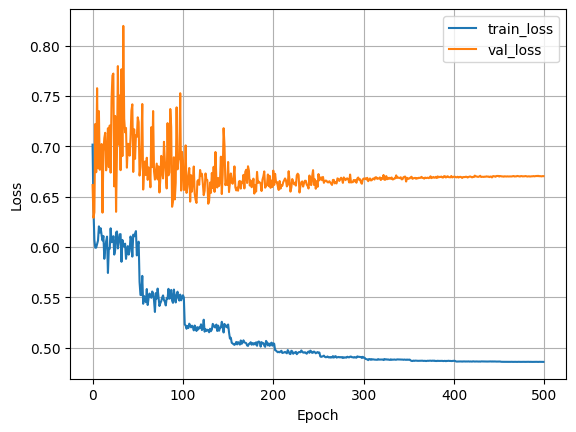

In [23]:
# Plot the loss

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
#plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

val_loss_per_epoch = history.history['val_loss']
train_loss_per_epoch = history.history['loss']
best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

In [24]:
def plot_PredvsTrue(y_true, y_pred):

    plt.figure(figsize=(3, 3), dpi=200)
    p1 = min(y_true)
    p2 = max(y_true)
    #p1 = 0
    #p2 = 64
    #p1 = max(max(y_pred), max(y_true))
    #p2 = min(min(y_pred), min(y_true))
    plt.plot([p1, p2], [p1, p2], 'r--', label="Exact")
    plt.scatter(y_true,y_pred,color="blue",label="Model",s=6)
    plt.xlabel('True',fontsize=15)
    plt.ylabel('Pred',fontsize=15)
    plt.legend(loc="upper left")
    plt.show()

8/8 [==============================] - 0s 997us/step
(237, 1)
(237, 1)


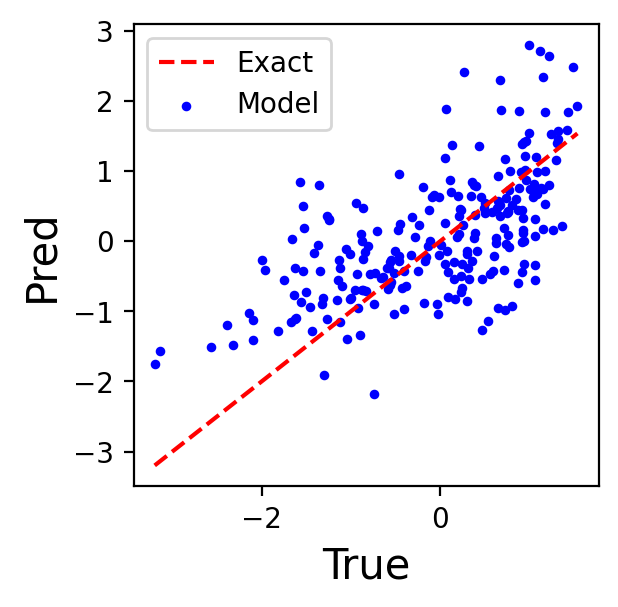

Test MAE: 0.6561405949714952
Test MSE: 0.6934363317333251


In [25]:
# Pred vs True values on test set 

y_pred = model.predict(x_test)
#y_pred = model.predict(x=[x_test[:,0:n_features],x_test[:,n_features:]])
y_pred.shape
y_true = np.zeros((len(y_test),1))
y_true[:,0] = y_test[:]

print(y_true.shape)
print(y_pred.shape)
#print(y_true)
#print(y_pred)

plot_PredvsTrue(y_true, y_pred)

test_mae = mean_absolute_error(y_true,y_pred)
test_mse = mean_squared_error(y_true,y_pred)

print("Test MAE: "+str(test_mae))
print("Test MSE: "+str(test_mse))

In [26]:
# save model

#reloaded_model = tf.keras.models.load_model('R_model')
model.save('./Models/R_model_invariant_2body')

INFO:tensorflow:Assets written to: ./Models/R_model_invariant_2body/assets


INFO:tensorflow:Assets written to: ./Models/R_model_invariant_2body/assets


30/30 [==============================] - 0s 813us/step


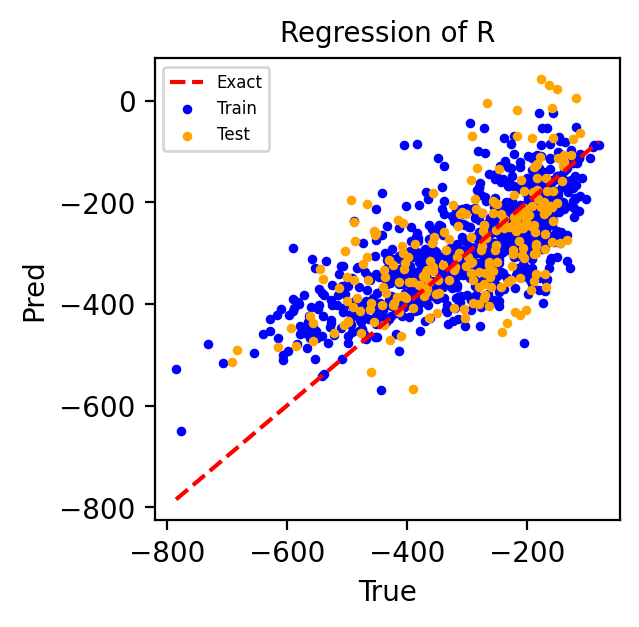

Train MAE (non-normalized): 61.72128005716916
Train RMSE (non-normalized): 82.9797610985311
Train MAPE (non-normalized): 22.764252524109956
Train R2 (non-normalized): 0.5406674916841245

Test MAE (non-normalized): 80.31822977186758
Test RMSE (non-normalized): 101.93433955385723
Test MAPE (non-normalized): 29.598315315839507
Test R2 (non-normalized): 0.2995736130006321


In [27]:
# Evaluate the model with non-normalized units on the whole dataset

y_pred_test = model.predict(x_test)
#y_pred_test = model.predict(x=[x_test[:,0:n_features],x_test[:,n_features:]])
y_true_test = np.zeros((len(y_test),1))
y_true_test[:,0] = y_test[:]

y_pred_train = model.predict(x_train)
#y_pred_train = model.predict(x=[x_train[:,0:n_features],x_train[:,n_features:]])
y_true_train = np.zeros((len(y_train),1))
y_true_train[:,0] = y_train[:]

y_true_test = y_true_test * R_std + R_mean
y_pred_test = y_pred_test * R_std + R_mean
y_true_test = y_true_test.ravel()
y_pred_test = y_pred_test.ravel()

y_true_train = y_true_train * R_std + R_mean
y_pred_train = y_pred_train * R_std + R_mean
y_true_train = y_true_train.ravel()
y_pred_train = y_pred_train.ravel()

#y_true_val = y_true_val * R_std + R_mean
#y_pred_val = y_pred_val * R_std + R_mean
#y_true_val = y_true_val.ravel()
#y_pred_val = y_pred_val.ravel()

plt.figure(figsize=(3, 3), dpi=200)
plt.title("Regression of R",fontsize=10)
p1 = min(y_true_train)
p2 = max(y_true_train)
plt.plot([p1, p2], [p1, p2], 'r--', label="Exact")
plt.scatter(y_true_train,y_pred_train,color="blue",label="Train",s=6)
plt.scatter(y_true_test,y_pred_test,color="orange",label="Test",s=6)
#plt.scatter(y_true_val,y_pred_val,color="green",label="Val",s=6)
plt.xlabel('True',fontsize=10)
plt.ylabel('Pred',fontsize=10)
plt.legend(loc="upper left",prop={'size': 6})
plt.show()

train_mae = mean_absolute_error(y_true_train,y_pred_train)
print("Train MAE (non-normalized): "+str(train_mae))
train_mse = mean_squared_error(y_true_train,y_pred_train,squared=False)
print("Train RMSE (non-normalized): "+str(train_mse))
train_mape = mean_absolute_percentage_error(y_true_train,y_pred_train)*100
print("Train MAPE (non-normalized): "+str(train_mape))
train_r2 = r2_score(y_true_train,y_pred_train)
print("Train R2 (non-normalized): "+str(train_r2))

print()
test_mae = mean_absolute_error(y_true_test,y_pred_test)
print("Test MAE (non-normalized): "+str(test_mae))
test_mse = mean_squared_error(y_true_test,y_pred_test,squared=False)
print("Test RMSE (non-normalized): "+str(test_mse))
test_mape = mean_absolute_percentage_error(y_true_test,y_pred_test)*100
print("Test MAPE (non-normalized): "+str(test_mape))
test_r2 = r2_score(y_true_test,y_pred_test)
print("Test R2 (non-normalized): "+str(test_r2))

#val_mae = mean_absolute_error(y_true_val,y_pred_val)
#print("val MAE (non-normalized): "+str(val_mae))

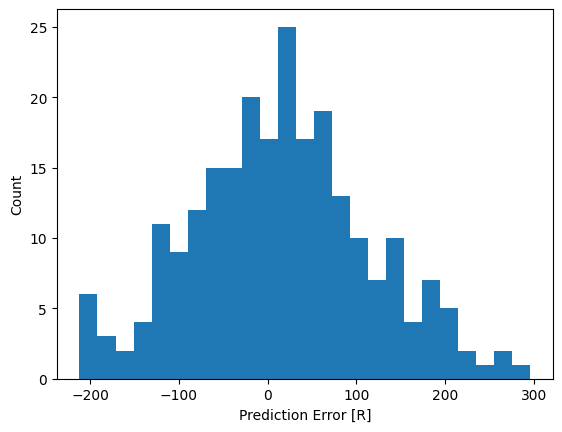

In [28]:
# Error distribution
error = y_pred_test - y_true_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [R]')
_ = plt.ylabel('Count')


[ 0.  4. 36. 37. 49. 33. 78.]
[        nan 74.22509302 78.32924012 70.41949566 82.95686009 86.39917081
 82.01393999]


/home/alfonso/Work/UGR/Calculations/Helicenes_NNs/Helicenes_venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/alfonso/Work/UGR/Calculations/Helicenes_NNs/Helicenes_venv/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


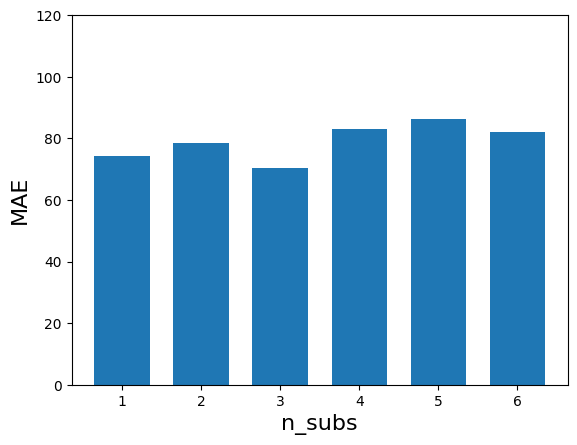

In [29]:
# Error for different nsubs on Test set

#x_test = test_features.to_numpy()

nsubs_test = np.zeros( x_test.shape[0] )
#print(x_test[0,:])

# compute number of substitutes for each data test
for i in range(len(nsubs_test)):

    # for each data, check if first input of every position is an hydrogen
    nsubs_i = 0
    for j in range(n_pos):
        if( x_test[i,j*n_atom_types]==0.0 ): # no hydrogen, hence there is a different substitute
            nsubs_i = nsubs_i+1
    nsubs_test[i] = nsubs_i
#print(nsubs_test)

error0 = []
error1 = []
error2 = []
error3 = []
error4 = []
error5 = []
error6 = []
num_subs = np.zeros(7)
for i in range(len(nsubs_test)):
    error_i = y_pred_test[i] - y_true_test[i]
    if(nsubs_test[i]==0): 
        error0.append(error_i)
        num_subs[0] +=1
    if(nsubs_test[i]==1): 
        error1.append(error_i)
        num_subs[1] +=1
    if(nsubs_test[i]==2): 
        error2.append(error_i)
        num_subs[2] +=1
    if(nsubs_test[i]==3): 
        error3.append(error_i)
        num_subs[3] +=1
    if(nsubs_test[i]==4): 
        error4.append(error_i)
        num_subs[4] +=1
    if(nsubs_test[i]==5): 
        error5.append(error_i)
        num_subs[5] +=1
    if(nsubs_test[i]==6): 
        error6.append(error_i)
        num_subs[6] +=1

error_nsubs = np.zeros(7)
error_nsubs[0] = np.mean(np.abs(error0))
error_nsubs[1] = np.mean(np.abs(error1))
error_nsubs[2] = np.mean(np.abs(error2))
error_nsubs[3] = np.mean(np.abs(error3))
error_nsubs[4] = np.mean(np.abs(error4))
error_nsubs[5] = np.mean(np.abs(error5))
error_nsubs[6] = np.mean(np.abs(error6))

print(num_subs)
print(error_nsubs)

bin_edges = np.arange(1.5,6.5+1,1)
plt.bar([0,1,2,3,4,5,6],error_nsubs[0:], width=0.7)
plt.xlabel("n_subs",fontsize=16)
plt.ylabel("MAE",fontsize=16)
plt.ylim([0,120])
plt.show()

[  1.  28. 114. 166. 160. 177. 300.]
[93.57324458 81.52223047 63.89843023 66.3503044  56.90180149 64.01015633
 57.59825917]


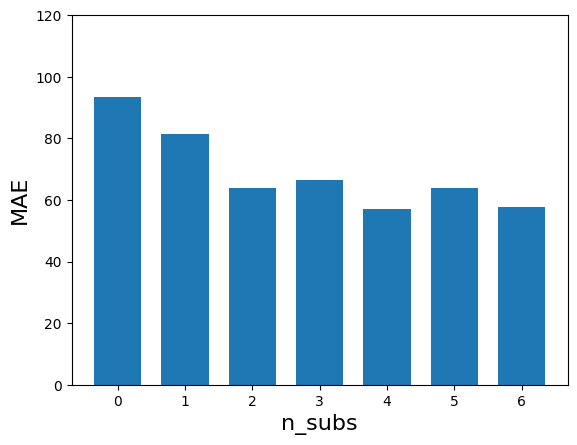

In [30]:
# Error for different nsubs on Training set

nsubs_train = np.zeros( x_train.shape[0] )
#print(x_train[0,:])

# compute number of substitutes for each data train
for i in range(len(nsubs_train)):

    # for each data, check if first input of every position is an hydrogen
    nsubs_i = 0
    for j in range(n_pos):
        if( x_train[i,j*n_atom_types]==0.0 ): # no hydrogen, hence there is a different substitute
            nsubs_i = nsubs_i+1
    nsubs_train[i] = nsubs_i
#print(nsubs_train)

error0 = []
error1 = []
error2 = []
error3 = []
error4 = []
error5 = []
error6 = []
num_subs = np.zeros(7)
for i in range(len(nsubs_train)):
    error_i = y_pred_train[i] - y_true_train[i]
    if(nsubs_train[i]==0): 
        error0.append(error_i)
        num_subs[0] +=1
    if(nsubs_train[i]==1): 
        error1.append(error_i)
        num_subs[1] +=1
    if(nsubs_train[i]==2): 
        error2.append(error_i)
        num_subs[2] +=1
    if(nsubs_train[i]==3): 
        error3.append(error_i)
        num_subs[3] +=1
    if(nsubs_train[i]==4): 
        error4.append(error_i)
        num_subs[4] +=1
    if(nsubs_train[i]==5): 
        error5.append(error_i)
        num_subs[5] +=1
    if(nsubs_train[i]==6): 
        error6.append(error_i)
        num_subs[6] +=1

error_nsubs = np.zeros(7)
error_nsubs[0] = np.mean(np.abs(error0))
error_nsubs[1] = np.mean(np.abs(error1))
error_nsubs[2] = np.mean(np.abs(error2))
error_nsubs[3] = np.mean(np.abs(error3))
error_nsubs[4] = np.mean(np.abs(error4))
error_nsubs[5] = np.mean(np.abs(error5))
error_nsubs[6] = np.mean(np.abs(error6))

print(num_subs)
print(error_nsubs)

bin_edges = np.arange(1.5,6.5+1,1)
plt.bar([0,1,2,3,4,5,6],error_nsubs[0:], width=0.7)
plt.xlabel("n_subs",fontsize=16)
plt.ylabel("MAE",fontsize=16)
plt.ylim([0,120])
plt.show()

In [31]:
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

for name, weight in zip(names, weights):
    print(name, weight.shape)
    
print()
print('1-BODY')
for i in range(8):
    print(weights[i].flatten()*R_std)

print()
print('2-BODY')
for i in range(8,16):
    print(weights[i].flatten()*R_std)    

1B_0/kernel:0 (5, 1)
1B_1/kernel:0 (5, 1)
1B_2/kernel:0 (5, 1)
1B_3/kernel:0 (5, 1)
1B_4/kernel:0 (5, 1)
1B_5/kernel:0 (5, 1)
1B_6/kernel:0 (5, 1)
1B_7/kernel:0 (5, 1)
2B_0/kernel:0 (25, 1)
2B_1/kernel:0 (25, 1)
2B_2/kernel:0 (25, 1)
2B_3/kernel:0 (25, 1)
2B_4/kernel:0 (25, 1)
2B_5/kernel:0 (25, 1)
2B_6/kernel:0 (25, 1)
2B_7/kernel:0 (25, 1)

1-BODY
[-20.039795  32.89647   21.457159  12.328453  42.09977 ]
[-0.9175155 21.333313  20.028797  24.049324  28.438932 ]
[  7.8313866  23.424587    3.1857631 -18.023817    1.3943616]
[-1.7145624  6.24496    5.271502  12.103382  36.262077 ]
[ 5.2430367 -4.1943274  5.4583077 11.265299  54.18849  ]
[-11.011918   -5.394949    4.9886217  25.049961   24.87682  ]
[ 0.81812125 -7.104052    7.0014477   5.2417116  37.752804  ]
[-1.28511   -6.446035  -1.2058505 13.1990185 32.40152  ]

2-BODY
[-15.602106  -13.512053    2.663259   -1.8682181  19.878874   36.376926
 -30.89413   -62.98919    60.04226    53.752197  -11.565006   29.761549
  26.102125   14.998875  

In [32]:
# How to interpret 2-body coefficients

x1 = np.zeros(5)
x2 = np.zeros(5)

# (H, F, Cl, Br, I) = (0, 1, 2, 3, 4)
x1[3] = 1.0   # Br
x2[4] = 1.0   # I

x12 = np.tensordot(x1,x2,axes=0)
print(x12)
x12 = x12.flatten()
print()
print(x12)
x12 = x12.reshape(5,5)
print()
print(x12)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0.]

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]


In [33]:
# 2-Body coefficients

a_2b = weights[8:16]
a_2b = np.array(a_2b)
print(a_2b.shape)
a_2b = a_2b[:,:,0]
print(a_2b.shape)

a_matrix = a_2b.reshape((8,5,5))
print(a_matrix.shape)

#np.set_printoptions(precision=2)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
for i in range(a_matrix.shape[0]):
    print()
    print(np.round(a_matrix[i,:,:]*R_std,2))

(8, 25, 1)
(8, 25)
(8, 5, 5)

[[-15.600 -13.510 2.660 -1.870 19.880]
 [36.380 -30.890 -62.990 60.040 53.750]
 [-11.570 29.760 26.100 15.000 7.920]
 [-21.420 53.920 47.320 -6.980 48.100]
 [57.730 17.130 14.160 13.800 -37.000]]

[[0.220 -1.530 -6.980 -6.040 -2.110]
 [-0.750 41.370 -9.210 -46.470 63.990]
 [18.470 80.710 -23.500 -24.970 19.620]
 [10.860 20.500 -48.490 42.230 18.600]
 [27.790 -0.970 115.540 17.820 -58.510]]

[[11.180 31.390 -15.790 -10.520 19.070]
 [8.220 -27.600 103.690 -17.920 18.770]
 [-30.620 8.860 -30.520 81.210 16.040]
 [-16.960 -31.700 -133.270 41.120 57.430]
 [-15.550 -12.910 108.020 -11.690 1.590]]

[[-4.860 -3.670 -23.050 -8.350 -24.170]
 [-15.360 40.100 33.940 -17.480 39.030]
 [6.800 11.690 -10.690 -21.290 67.770]
 [-1.250 -98.090 8.740 31.260 88.250]
 [-3.270 12.520 46.980 52.760 40.980]]

[[-7.090 1.220 -24.050 -2.490 38.090]
 [-23.900 -41.580 55.390 -4.460 55.730]
 [-10.880 43.890 56.570 -31.780 41.450]
 [13.230 29.530 -33.170 7.670 0.190]
 [24.110 -0.690 55.0

In [34]:
# Invariance test

x1 = dataset_np[132,0:16].copy()
x1_flip = x1.copy()
x1_flip = np.flip(x1)

# one-hot encode

x1_ohe = np.zeros((1,n_features))
x1_flip_ohe = np.zeros((1,n_features))
for j in range(n_pos):
    #atom_id = int(dataset_np[0,j])
    atom_id = int(x1[j])
    x1_ohe[0,j*n_atom_types+atom_id] = 1.0
    atom_id = int(x1_flip[j])
    x1_flip_ohe[0,j*n_atom_types+atom_id] = 1.0

print(x1)
y_pred1 = model.predict(x1_ohe)
print(y_pred1[0])

print()
print(x1_flip)
y_pred1_flip = model.predict(x1_flip_ohe)
print(y_pred1_flip[0])

[0.000 3.000 0.000 0.000 0.000 0.000 3.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000]
1/1 [==============================] - 0s 16ms/step
[-0.355]

[0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 3.000 0.000 0.000
 0.000 0.000 3.000 0.000]
1/1 [==============================] - 0s 15ms/step
[-0.355]


In [35]:
# Save weights
print('1-BODY')
weights_1b = np.zeros((8,n_atom_types))
for i in range(8):
    weights_1b[i] = weights[i].flatten()    
    print('Pos'+str(i)+': '+str(weights_1b[i]*R_std))

print()
print('2-BODY')
weights_2b = np.zeros((8,n_dim_2body))
for i in range(8,16):
    #print(i)
    weights2b = weights[i].flatten()    
    weights_2b[i-8] = weights[i].flatten()    
    print('Pos'+str(i-8)+': '+str(weights_2b[i-8]*R_std))    

1-BODY
Pos0: [-20.040 32.896 21.457 12.328 42.100]
Pos1: [-0.918 21.333 20.029 24.049 28.439]
Pos2: [7.831 23.425 3.186 -18.024 1.394]
Pos3: [-1.715 6.245 5.272 12.103 36.262]
Pos4: [5.243 -4.194 5.458 11.265 54.188]
Pos5: [-11.012 -5.395 4.989 25.050 24.877]
Pos6: [0.818 -7.104 7.001 5.242 37.753]
Pos7: [-1.285 -6.446 -1.206 13.199 32.402]

2-BODY
Pos0: [-15.602 -13.512 2.663 -1.868 19.879 36.377 -30.894 -62.989 60.042 53.752
 -11.565 29.762 26.102 14.999 7.924 -21.421 53.917 47.317 -6.978 48.096
 57.734 17.131 14.156 13.796 -37.005]
Pos1: [0.219 -1.529 -6.982 -6.040 -2.105 -0.755 41.366 -9.214 -46.475 63.992
 18.472 80.711 -23.498 -24.971 19.615 10.856 20.496 -48.487 42.229 18.600
 27.788 -0.969 115.535 17.820 -58.511]
Pos2: [11.184 31.388 -15.794 -10.517 19.069 8.218 -27.598 103.691 -17.918 18.771
 -30.623 8.855 -30.522 81.210 16.039 -16.957 -31.704 -133.265 41.116
 57.431 -15.554 -12.915 108.016 -11.694 1.586]
Pos3: [-4.857 -3.670 -23.055 -8.352 -24.169 -15.362 40.105 33.942 -17.47

In [36]:
# function to evaluate 1-body and 2-body terms with the optimal parameters

def calculate_R( x_input ):

    R_model = float(model.predict(x=x_input))
    R_model = R_model * R_std + R_mean
    print(R_model)

    R_formula = 0

    #-------------------------
    # 1-BODY
    #-------------------------
    R1 = 0
    # Positions 1-8
    for i in range(int(n_pos/2)):
        init = i * n_atom_types
        end = init + n_atom_types
        x_i = x_input[0,init:end]
        R1 = R1 + np.dot(weights_1b[i],x_i)
    # Positions 9-16
    for i in range(int(n_pos/2),n_pos):
        init = i * n_atom_types
        end = init + n_atom_types
        x_i = x_input[0,init:end]
        R1 = R1 + np.dot(weights_1b[n_pos-1-i],x_i)

    #-------------------------
    # 2-BODY
    #-------------------------

    R2 = 0

    # First, define 2-body input pairs and save them

    single_pair = []
    # Positions 1-8 (left side of the molecule)
    for i in range(8):

        init = i * n_atom_types
        end = init + n_atom_types
        xi = x_input[0,init:end]

        init = (i+1) * n_atom_types
        end = init + n_atom_types
        xi_next = x_input[0,init:end]

        x_pair = np.tensordot(xi,xi_next,axes=0)
        x_pair = x_pair.flatten()        
        single_pair.append(x_pair)

    # Positions 16-10 (right side of the molecule).
    # Position 9 is not included because it was taken into account before, 
    # in the term j_8 and j_next=9 from the previous left side calculation.
    # To respect the simmetry, j_next is to the left.
    #for i in reversed(range(9,16)):
    for i in reversed(range(8,16)):

        init = i * n_atom_types
        end = init + n_atom_types
        xi = x_input[0,init:end]

        init = (i-1) * n_atom_types
        end = init + n_atom_types
        xi_next = x_input[0,init:end]

        x_pair = np.tensordot(xi,xi_next,axes=0)
        x_pair = x_pair.flatten()        
        single_pair.append(x_pair)

    # Once pairs have been defined, apply weights
    
    #print(single_pair)

    # Positions 1-8
    for i in range(int(n_pos/2)):
        x_pair = single_pair[i]
        R2 = R2 + np.dot(weights_2b[i],x_pair)

    # Positions 9-15
    #for i in range(8,16-1):
    for i in range(8,16):
        x_pair = single_pair[i]
        R2 = R2 + np.dot(weights_2b[i-8],x_pair)

    #-------------------------
    # TOTAL
    #-------------------------    
    
    R_formula = R1+R2
    R_formula = R_formula * R_std + R_mean
    print(R_formula)

    return R_model, R_formula

x_example = np.zeros((1,n_features))
x_example[0,:] = x_data[100,:]
print(x_example.shape)
R_model, R_formula = calculate_R(x_example)

# Flip example
x_flip_example = np.zeros((1,n_features))
for i in range(n_pos):
    init = i * n_atom_types
    end = init + n_atom_types
    x_i = x_example[0,init:end]
    i_flip = n_pos - i -1
    init = i_flip * n_atom_types
    end = init + n_atom_types
    x_flip_example[0,init:end] = x_i[:]

print()
#print(x_example)
#print(x_flip_example)
R_model, R_formula = calculate_R(x_flip_example)

# Flip example
x_ex = dataset_np[132,0:16].copy()
x_flip_ex = x_ex.copy()
x_flip_ex = np.flip(x_flip_ex)
print()
print(x_ex)
print(x_flip_ex)

x_ex_ohe = np.zeros((1,n_features))
x_flip_ex_ohe = np.zeros((1,n_features))
for j in range(n_pos):
    atom_id = int(x_ex[j])
    x_ex_ohe[0,j*n_atom_types+atom_id] = 1.0
    atom_id = int(x_flip_ex[j])
    x_flip_ex_ohe[0,j*n_atom_types+atom_id] = 1.0

R_model, R_formula = calculate_R(x_ex_ohe)
R_model, R_formula = calculate_R(x_flip_ex_ohe)

(1, 80)
1/1 [==============================] - 0s 15ms/step
-352.9158102270863
-352.9157980572359

1/1 [==============================] - 0s 15ms/step
-352.91578833845614
-352.9157980572359

[0.000 3.000 0.000 0.000 0.000 0.000 3.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000]
[0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 3.000 0.000 0.000
 0.000 0.000 3.000 0.000]
1/1 [==============================] - 0s 15ms/step
-343.299649806075
-343.2996489795512
1/1 [==============================] - 0s 14ms/step
-343.29965345418003
-343.2996489795512
